In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

import os
os.chdir('../Python')
from utilities import *
os.chdir('../development')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [189]:
results_file ='train_test_results_test1'
info_file ='train_test_results_test1_info'

graph_file = '../figures/xgb_res_summary_1.png'


In [190]:

results = load(results_file)
res_info = load(info_file)

In [191]:
nbs = res_info[6].split(',')
nb_pl=int(nbs[0][-3:])
try:
    nb_tour = int(nbs[1][-3:])
except:
    nb_tour = int(nbs[1][-2:])

IndexError: list index out of range

In [192]:
dates = []
f1 = np.zeros((len(results),6))
f2 = np.zeros((len(results),6))
f3 = np.zeros((len(results),6))
f4 = np.zeros((len(results),6))
for i in range(len(results)):
    dates.append(results[i][0])
    f1[i,0] = results[i][1][1]
    f1[i,1] = results[i][2][1]
    f1[i,2] = results[i][3][1]
    f1[i,3] = results[i][4][1]
    f1[i,4] = results[i][5][1]
    f1[i,5] = results[i][6][1]
    f3[i,0] = results[i][7]
    f3[i,1] = results[i][8]
    f3[i,2] = results[i][9]
    f3[i,3] = results[i][10]
    f3[i,4] = results[i][11]
    f3[i,5] = results[i][12]

In [193]:
for r in range(6):
    f2[:,r] = f1[:,r].cumsum()
    f4[:,r] = f3[:,r].cumsum()

f5 = np.zeros((len(results),6))
f5 = -f2/f4

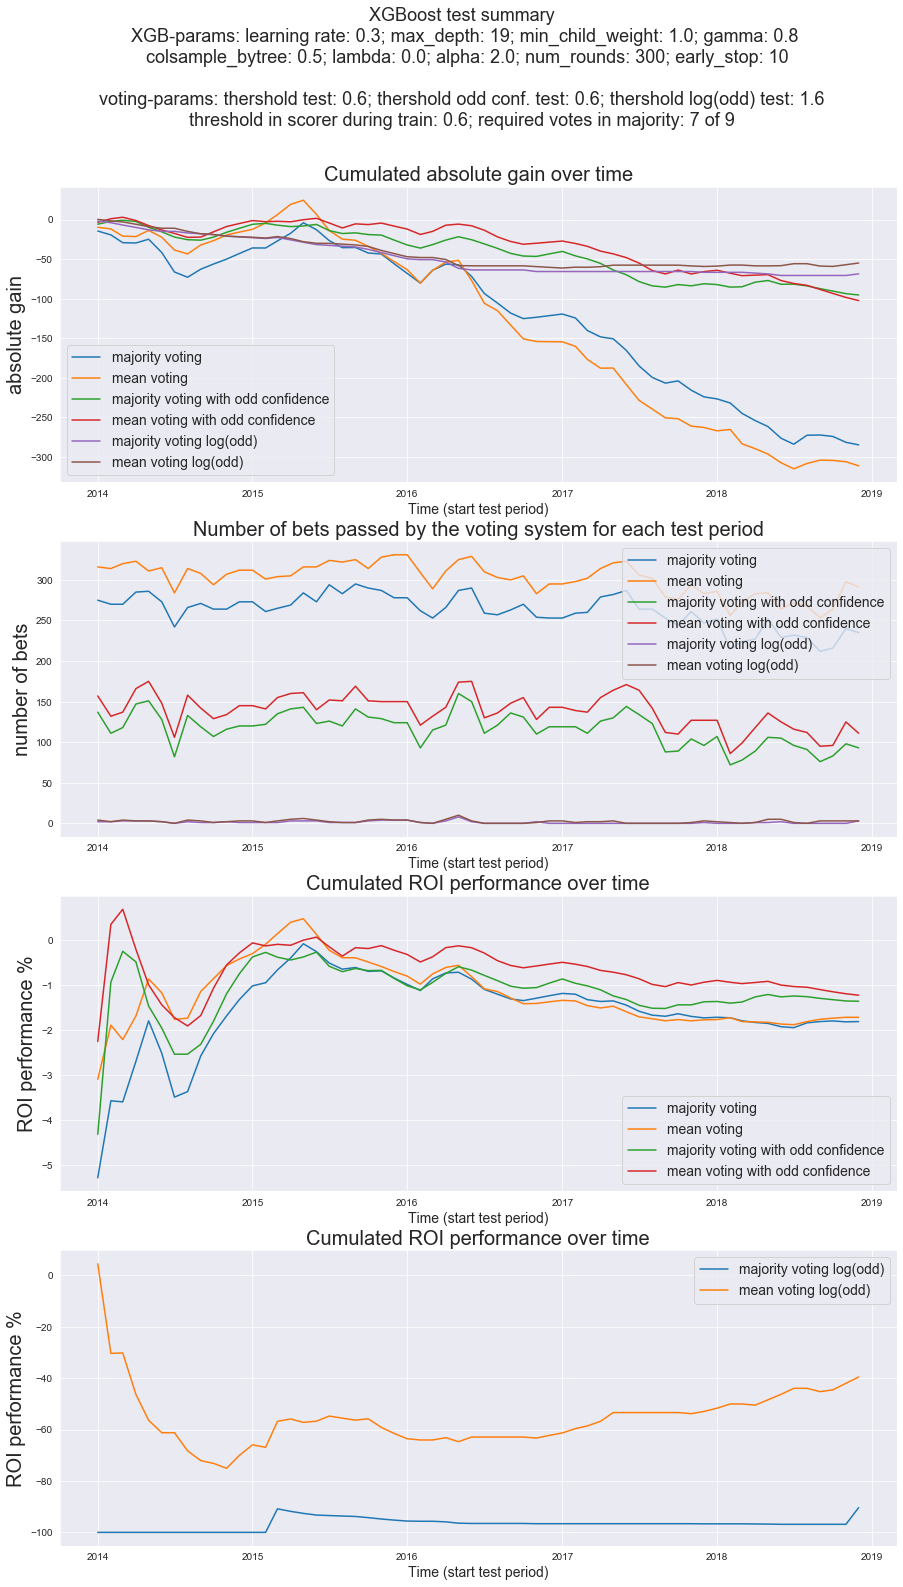

In [194]:
fig, ax  = plt.subplots(4,1,figsize = (15,25))
ax[0].plot(dates,(f2*(-1)));
labels = ['majority voting','mean voting', 'majority voting with odd confidence','mean voting with odd confidence', 'majority voting log(odd)','mean voting log(odd)' ]
ax[0].legend(labels, fontsize = 14)
ax[0].set_xlabel('Time (start test period)', fontsize = 14);
ax[0].set_ylabel('absolute gain', fontsize = 20);
ax[0].set_title('Cumulated absolute gain over time', fontsize = 20);

ax[1].plot(dates,(f3));
ax[1].legend(labels, fontsize = 14)
ax[1].set_xlabel('Time (start test period)', fontsize = 14);
ax[1].set_ylabel('number of bets', fontsize = 20);
ax[1].set_title('Number of bets passed by the voting system for each test period', fontsize = 20);

ax[2].plot(dates,(f5[:,0:4]*100));
ax[2].legend(labels, fontsize = 14)
ax[2].set_xlabel('Time (start test period)', fontsize = 14);
ax[2].set_ylabel('ROI performance %', fontsize = 20);
ax[2].set_title('Cumulated ROI performance over time', fontsize = 20);

ax[3].plot(dates,(f5[:,4:6]*100));
ax[3].legend(labels[4:6], fontsize = 14)
ax[3].set_xlabel('Time (start test period)', fontsize = 14);
ax[3].set_ylabel('ROI performance %', fontsize = 20);
ax[3].set_title('Cumulated ROI performance over time', fontsize = 20);


title = 'XGBoost test summary \n'\
        f'XGB-params: learning rate: {res_info[5][0]}; max_depth: {int(res_info[5][1])}; min_child_weight: {res_info[5][2]}; gamma: {res_info[5][3]}\n ' \
        f' colsample_bytree: {res_info[5][4]}; lambda: {res_info[5][5]}; alpha: {res_info[5][6]}; num_rounds: {int(res_info[5][7])}; early_stop: {int(res_info[5][8])} \n\n' \
        f'voting-params: thershold test: {res_info[0]}; thershold odd conf. test: {res_info[1]}; thershold log(odd) test: {res_info[3]} \n'\
        f'threshold in scorer during train: {res_info[4]}; required votes in majority: {int(res_info[2]*9)} of 9 \n'
        #f'dropping: number best players: {nb_pl}; number best tounaments: {nb_tour}'
fig.suptitle(title, fontsize = 18);


plt.show()

fig.savefig(graph_file)

In [195]:
res_info

[0.6,
 0.6,
 0.7777777777777778,
 1.6,
 0.6,
 array([  0.3,  19. ,   1. ,   0.8,   0.5,   0. ,   2. , 300. ,  10. ])]

In [126]:
nbs = res_info[6].split(',')
int(nbs[0][-3:])
try:
    int(nbs[1][-3:])
except:
    int(nbs[1][-2:])